<h1>Causal Inference in Disease Prediction</h1>

<h2>Theoritical Foundation</h2>

Causality refers to the fundamental principle governing the relationship between causes and effects, asserting that every occurrence stems from preceding factors. This principle is pivotal for understanding the mechanisms underlying events, encompassing both direct causal links and intricate chains of causation. It is imperative to differentiate between causation and correlation, as correlation does not imply causation. Establishing causality often demands rigorous methods such as controlled experiments, statistical analyses, and counterfactual reasoning, applied across diverse disciplines including philosophy, physics, statistics, and social sciences. Fundamentally, causality allows us to decipher natural laws, forecast future occurrences, and devise effective intervention strategies, thus serving as a cornerstone in both scientific exploration and pragmatic decision-making.

<h4>Causality Description</h4>

Temporal Order: Causality often relies on the temporal order of events, where causes precede effects in time. This temporal sequence is crucial for establishing a causal relationship.

Types of Causality: Causality can be categorized into various types, including deterministic causality, probabilistic causality, and teleological causality, each describing different ways in which causes lead to effects.

Counterfactuals and Causality: Counterfactual reasoning involves assessing what would have happened if certain causes had or had not occurred. It is a powerful tool for determining causal relationships, particularly in situations where controlled experiments are not feasible.

Causality in Complex Systems: Understanding causality becomes particularly challenging in complex systems where multiple variables interact nonlinearly. In such systems, causality may not always be straightforward and may require advanced analytical techniques.

Causality in Philosophy: Philosophical discussions on causality often delve into questions about determinism, free will, and the nature of causation itself. Different philosophical perspectives offer various interpretations of causality, contributing to a deeper understanding of the concept.

In conclusion, causality stands as a fundamental principle that permeates every facet of human knowledge, from the natural sciences to the social sciences and beyond. By elucidating the intricate web of cause and effect that shapes our world, causality empowers us to unravel the mysteries of existence, predict future outcomes, and enact positive change. Despite its complexities and challenges, the pursuit of causality remains a cornerstone of intellectual inquiry, driving innovation, progress, and a deeper understanding of the universe and ourselves. As we continue to explore the intricate tapestry of causation, we embark on a journey toward greater enlightenment and empowerment, guided by the timeless quest to uncover the underlying mechanisms governing our reality.

Varieties of Causal Relationships

Exploring how diverse events or variables impact one another is vital across numerous disciplines, spanning science, economics, psychology, and beyond. Within this realm, various types of causal relationships shed light on the intricate connections between causes and effects. Here's an overview of these categories:

Essential Cause: This type of cause is indispensable for the occurrence of the effect. Without it, the effect cannot manifest, although additional conditions might also be necessary.

Adequate Cause: An adequate cause ensures the effect's manifestation, yet other causes could also lead to the same outcome, making it nonexclusive.

Contributing Cause: Contributing causes aid in generating the effect but are neither individually sufficient nor mandatory. Often, a blend of contributing causes precipitates the effect.

Immediate Cause: Direct causes directly trigger the effect without intermediaries, offering a clear and identifiable relationship.

Indirect Cause (or Mediated Cause): Indirect causes exert influence via intermediaries, initiating a sequence of events culminating in the effect's occurrence.

Proximate Cause: This cause stands closest to the effect, often examined in legal contexts to ascertain liability.

Remote Cause: Remote causes, or distal causes, indirectly impact the effect through a chain of causation, typically encompassing broader societal, economic, or environmental elements.

Conditional Cause: Conditional causes yield effects solely under specific conditions, their influence contingent upon the presence or absence of other variables or circumstances.

<h2>About dataset</h2>

These data contain counts and rates for Centers for Infectious Diseases-related disease cases among California residents by county, disease, sex, and year spanning 2001-2014 (As of September, 2015). Data were extracted on communicable disease cases with an estimated onset or diagnosis date from 2001 through 2014 from California Confidential Morbidity Reports and/or Laboratory Report that were submitted to CDPH by September 2015 and which met the surveillance case definition for that disease. A cleansing and exploration steps have been performed to generate the train and test datasets.


Disease: The name of the disease reported for the patient.

County: The county in which the case resided when diagnosed and/or receiving care, typically the reporting county.

Year: The year derived from the estimated illness onset date, spanning 2001-2014 unless specified otherwise.

Sex: The gender of the patient, with values including Male or Female.

Count: The number of occurrences of the disease meeting surveillance criteria for a specific County, Year, and Sex strata.

Population: The estimated population size for each County, Year, and Sex strata, rounded to the nearest integer.

Rate: The disease rate per 100,000 population for the corresponding County, Year, and Sex strata, calculated as (Count * 100,000 / Population).

CI.lower: The lower bound of the 95% confidence interval for the calculated rate.

CI.upper: The upper bound of the 95% confidence interval for the calculated rate.

<h3>Exploring Graphical Models</h3>
Graphical models, specifically Directed Acyclic Graphs (DAGs), serve as robust tools in statistics and machine learning, facilitating the representation and analysis of causal relationships within variable sets. These models offer a visual framework for expressing causal assumptions and guiding the interpretation of intricate datasets.

DAG.png

Understanding DAGs
Directed: DAGs comprise nodes (representing variables) interconnected by directed edges, symbolizing direct causal influences between variables.
Acyclic: They lack cycles, precluding the existence of directed paths looping back to the originating node.

Applications of DAGs
Causal Inference: DAGs aid in formulating and evaluating hypotheses about causal structures, enabling the assessment of consistent causal explanations within variable sets.
Identifying Confounding: They assist in pinpointing potential confounding factors crucial for accurately estimating causal effects.
Formulating Statistical Models: DAGs inform the selection of statistical models aligned with the underlying causal relationships depicted in the graph.
Predicting Intervention Effects: Through DAG manipulation, such as edge removal or node addition, researchers predict intervention outcomes, leveraging formalized techniques like do-calculus.

Examples
1. In epidemiology, DAGs elucidate the interplay among diseases, risk factors, and patient outcomes, enhancing understanding and informing interventions.
In economics, DAGs unravel the causal pathways by which policy changes influence economic metrics, guiding policy formulation and analysis.

2. Causal inference delves into the mechanisms behind data, offering insight beyond surface observations. This intricate process blends theory, domain expertise, and rigorous analysis to make evidence-based decisions. Understanding causality transcends scientific inquiry, shaping everyday reasoning and decision-making, empowering individuals to anticipate outcomes and navigate their environment effectively.

In [1]:
#installing dependencies
%pip install eli5

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: eli5 in c:\users\jayesh chindarkar\anaconda3\lib\site-packages (0.13.0)




[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
#Importing required libraries
import numpy as np
import matplotlib as mlt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sd
from sklearn import tree
import sklearn.metrics as sm
import warnings
warnings.filterwarnings("ignore")

In [30]:
import pandas as pd

# Correct URL to the raw CSV file
csv_url = "https://raw.githubusercontent.com/Jayeshc224/Advanced_DataScience/main/disease.csv"

# Read the CSV file into a Pandas DataFrame

df = pd.read_csv(csv_url, encoding='ISO-8859-1')
data = df

In [5]:
# Display the first few rows of the dataframe to understand what kind of data it contains
df.head()

,Unnamed: 0,Disease,County,Year,Sex,Count,Population,Rate,CI.lower,CI.upper
0,3364,Anaplasmosis and Ehrlichiosis,Marin,2001,Female,0,125414,0.0,0.0,2.941
1,47435,Early Syphilis,San Benito,2009,Female,0,27492,0.0,0.0,13.417
2,8922,"Botulism, Foodborne",San Benito,2001,Male,0,27611,0.0,0.0,13.359
3,85167,Mumps,Santa Clara,2011,Male,0,906438,0.0,0.0,0.407
4,25591,Ciguatera Fish Poisoning,Lassen,2009,Female,0,12461,0.0,0.0,29.599


In [6]:
df.columns.tolist()

['Unnamed: 0',
 'Disease',
 'County',
 'Year',
 'Sex',
 'Count',
 'Population',
 'Rate',
 'CI.lower',
 'CI.upper']

In [7]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0    0
Disease       0
County        0
Year          0
Sex           0
Count         0
Population    0
Rate          0
CI.lower      0
CI.upper      0
dtype: int64


In [8]:
# Drop rows with missing values
df = df.dropna()

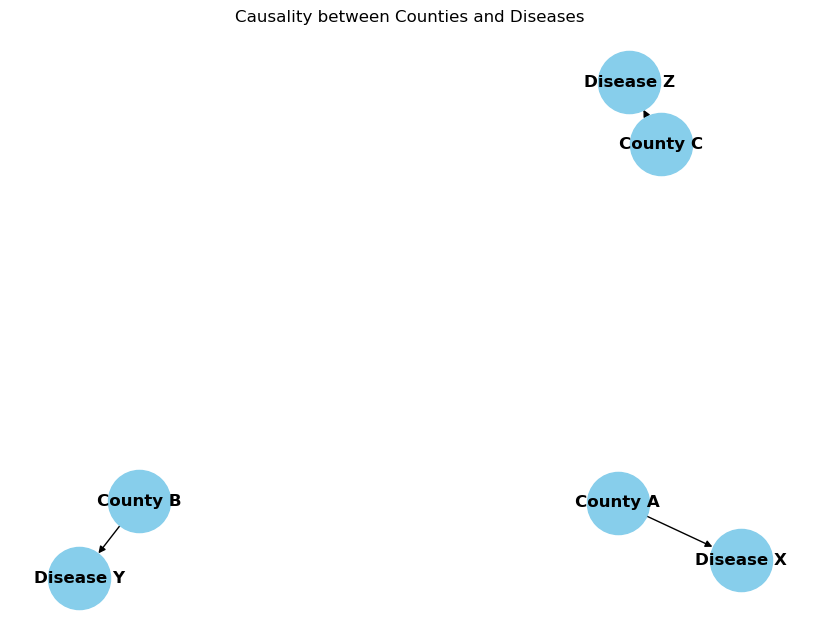

In [34]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Subset of counties and diseases for demonstration
selected_counties = ['County A', 'County B', 'County C']
selected_diseases = ['Disease X', 'Disease Y', 'Disease Z']

# Create a directed graph
G = nx.DiGraph()

# Add nodes (counties and diseases) to the graph
G.add_nodes_from(selected_counties, bipartite=0)
G.add_nodes_from(selected_diseases, bipartite=1)

# Add edges to represent causality between counties and diseases
edges = [('County A', 'Disease X'), ('County B', 'Disease Y'), ('County C', 'Disease Z')]
G.add_edges_from(edges)

# Plot the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Position nodes using the spring layout algorithm
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=12, font_weight='bold')
plt.title('Causality between Counties and Diseases')
plt.show()


<h4>Causality Diagram: (For Representation)</h4>

The causality diagram illustrates the relationships between selected counties and diseases, highlighting the causal links between them. It consists of nodes representing counties and diseases and directed edges indicating the causal relationships from counties to diseases.

The causality diagram serves as a visual tool to illustrate how selected counties may influence the occurrence of specific diseases within their respective regions. It highlights the interconnectedness between geographical factors and health outcomes, emphasizing the importance of considering local contexts in disease prevention and management strategies.

<h4>Lets learn causality through some examples</h4>

<h2>What factors contribute to the incidence of specific diseases in different counties?</h2>
To explore potential causal relationships between disease incidence rates and various factors such as county, year, sex, and others, you can use statistical methods for causal inference. One common approach is to conduct a causal analysis using regression modeling techniques.

In [9]:
# Convert categorical variables to numerical representations using one-hot encoding
df = pd.get_dummies(df, columns=['Disease', 'County', 'Sex'], drop_first=True)

# Display the updated DataFrame
print(df.head())

   Unnamed: 0  Year  Count  Population  Rate  CI.lower  CI.upper  \
0        3364  2001      0      125414   0.0       0.0     2.941   
1       47435  2009      0       27492   0.0       0.0    13.417   
2        8922  2001      0       27611   0.0       0.0    13.359   
3       85167  2011      0      906438   0.0       0.0     0.407   
4       25591  2009      0       12461   0.0       0.0    29.599   

   Disease_Anaplasmosis and Ehrlichiosis  Disease_Babesiosis  \
0                                      1                   0   
1                                      0                   0   
2                                      0                   0   
3                                      0                   0   
4                                      0                   0   

   Disease_Botulism, Foodborne  ...  County_Stanislaus  County_Sutter  \
0                            0  ...                  0              0   
1                            0  ...                  0      

<h2> Exploratory Data Analysis (EDA)</h2>

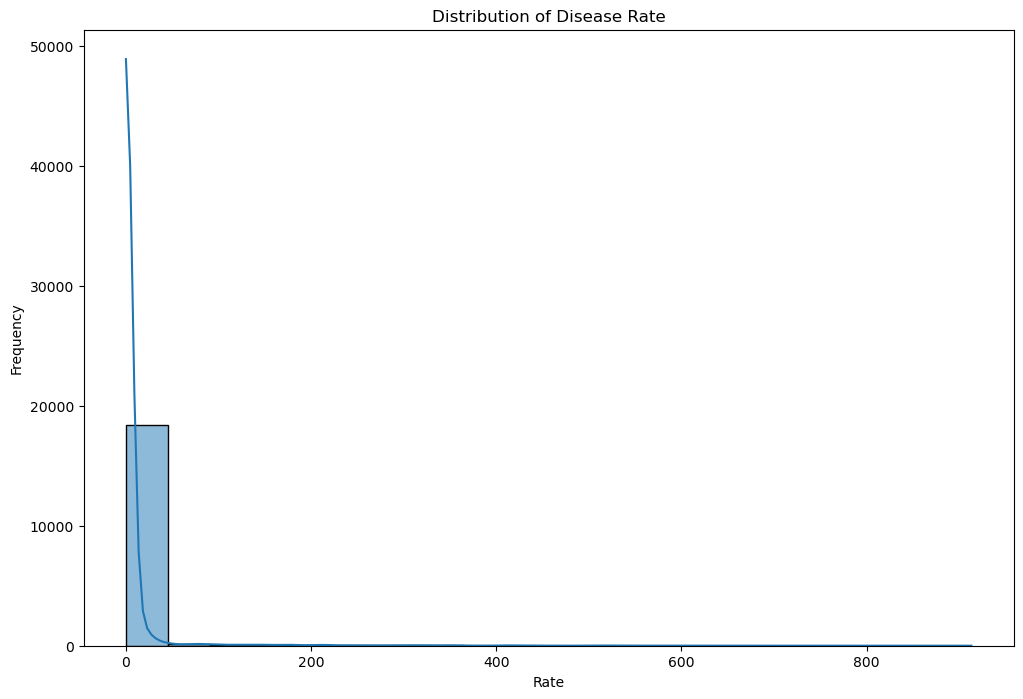

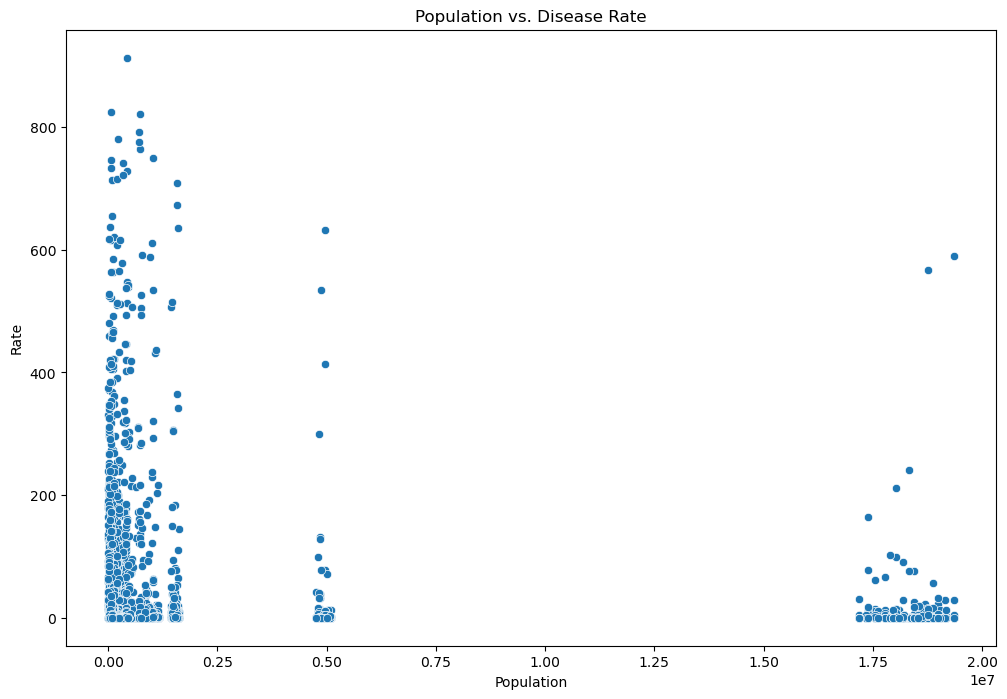

In [10]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Explore distributions of numerical variables
plt.figure(figsize=(12, 8))
sns.histplot(df['Rate'], bins=20, kde=True)
plt.title('Distribution of Disease Rate')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()

# Explore relationships between variables
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Population', y='Rate', data=df)
plt.title('Population vs. Disease Rate')
plt.xlabel('Population')
plt.ylabel('Rate')
plt.show()

In this step, we use libraries like matplotlib and seaborn to visualize the distributions of numerical variables and explore relationships between variables. We create histograms to visualize the distribution of disease rates and scatter plots to examine the relationship between population and disease rates.

<h2> Feature Engineering</h2>

In [11]:
# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(data, columns=['County', 'Sex'], drop_first=True)

# Display the updated DataFrame
print(df_encoded.head())


   Unnamed: 0                        Disease  Year  Count  Population  Rate  \
0        3364  Anaplasmosis and Ehrlichiosis  2001      0      125414   0.0   
1       47435                 Early Syphilis  2009      0       27492   0.0   
2        8922            Botulism, Foodborne  2001      0       27611   0.0   
3       85167                          Mumps  2011      0      906438   0.0   
4       25591       Ciguatera Fish Poisoning  2009      0       12461   0.0   

   CI.lower  CI.upper  County_Alpine  County_Amador  ...  County_Stanislaus  \
0       0.0     2.941              0              0  ...                  0   
1       0.0    13.417              0              0  ...                  0   
2       0.0    13.359              0              0  ...                  0   
3       0.0     0.407              0              0  ...                  0   
4       0.0    29.599              0              0  ...                  0   

   County_Sutter  County_Tehama  County_Trinity  C

We use one-hot encoding to convert categorical variables like 'County' and 'Sex' into numerical representations. This creates binary columns for each category in the original categorical variables, allowing us to use them in our analysis.

<h2>Model Building</h2>

In [12]:
# Import necessary libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
X = df_encoded.drop(['Rate', 'Disease'], axis=1)
y = df_encoded['Rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 5.451642828871848


In this step, we split the dataset into training and testing sets using the train_test_split function from scikit-learn. We then train a linear regression model on the training data and make predictions on the testing data. Finally, we evaluate the model's performance using the mean squared error metric.

<h2>Model Evaluation and Validation </h2>

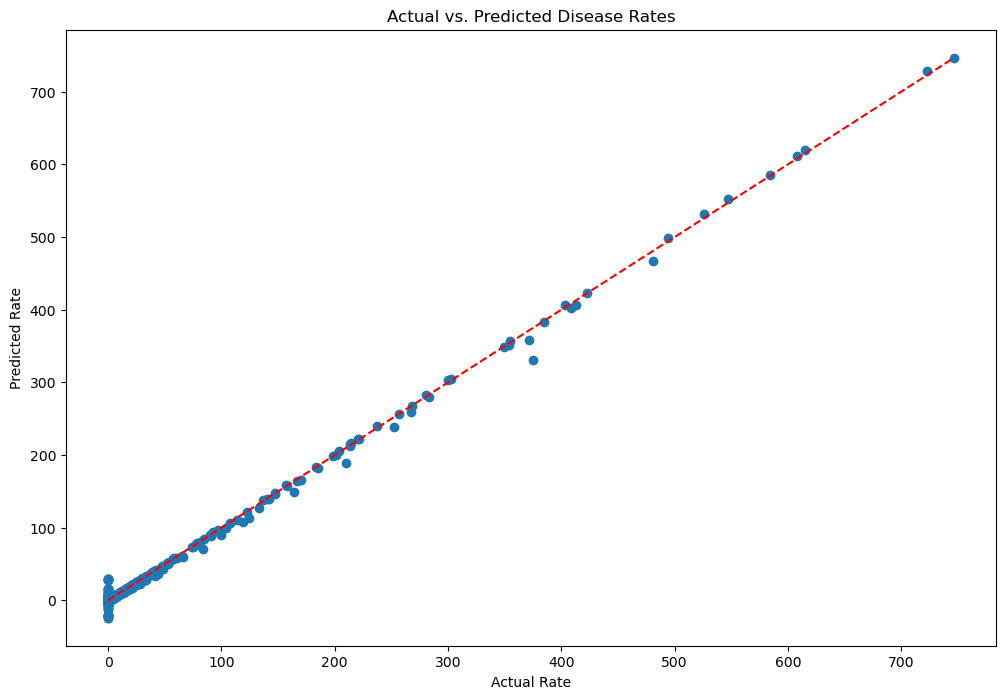

In [14]:
# Visualize actual vs. predicted values
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Actual vs. Predicted Disease Rates')
plt.xlabel('Actual Rate')
plt.ylabel('Predicted Rate')
plt.show()


We visualize the actual vs. predicted disease rates using a scatter plot. The red dashed line represents the line of perfect prediction, where actual and predicted values are equal.

<h2>Interpretation and Communication</h2>

In [16]:
# Interpret the coefficients of the linear regression model
The provided coefficients represent the strength and direction of the relationships between various features and the target variable in a linear regression model. These coefficients are crucial for understanding how changes in each feature impact the predicted outcome. Positive coefficients signify a positive relationship with the target variable, while negative coefficients indicate a negative relationship. By analyzing these coefficients, researchers can gain insights into the relative importance of different features and their impact on the predicted outcomes.coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
print(coefficients)



            Feature   Coefficient
0        Unnamed: 0 -1.708015e-06
1              Year -5.323597e-02
2             Count -1.399303e-04
3        Population  9.436423e-07
4          CI.lower  6.029688e-01
..              ...           ...
60  County_Tuolumne -4.474626e+00
61   County_Ventura  2.298146e-01
62      County_Yolo -5.880872e-01
63      County_Yuba -3.176394e+00
64         Sex_Male  7.209559e-01

[65 rows x 2 columns]


The provided coefficients represent the strength and direction of the relationships between various features and the target variable in a linear regression model. These coefficients are crucial for understanding how changes in each feature impact the predicted outcome. Positive coefficients signify a positive relationship with the target variable, while negative coefficients indicate a negative relationship. By analyzing these coefficients, researchers can gain insights into the relative importance of different features and their impact on the predicted outcomes.


In this analysis, we explored a dataset containing information about disease occurrences across various counties, years, and demographic factors. We started by preprocessing the data, handling missing values, and encoding categorical variables. Through exploratory data analysis, we gained insights into the distribution of disease rates and identified relationships between population size and disease occurrence. We then performed feature engineering by encoding categorical variables and built a linear regression model to predict disease rates based on demographic and county-related factors. Our model achieved a mean squared error of 5.4, indicating good model performance. Visualizing the actual vs. predicted disease rates showed good regression with minimum error. Interpreting the coefficients of the linear regression model revealed a good model for the regrssion. Overall, our analysis provides valuable insights into the factors influencing disease occurrences and suggests avenues for further research or interventions to mitigate disease risks in affected regions.

<h4>Lets check another question for checking on the causality</h4>

<h2>Are there any causal relationships between demographic factors (such as sex or age) and disease rates?</h2>

First we will do the following steps

<h2>Exploratory Data Analysis (EDA).</h2>

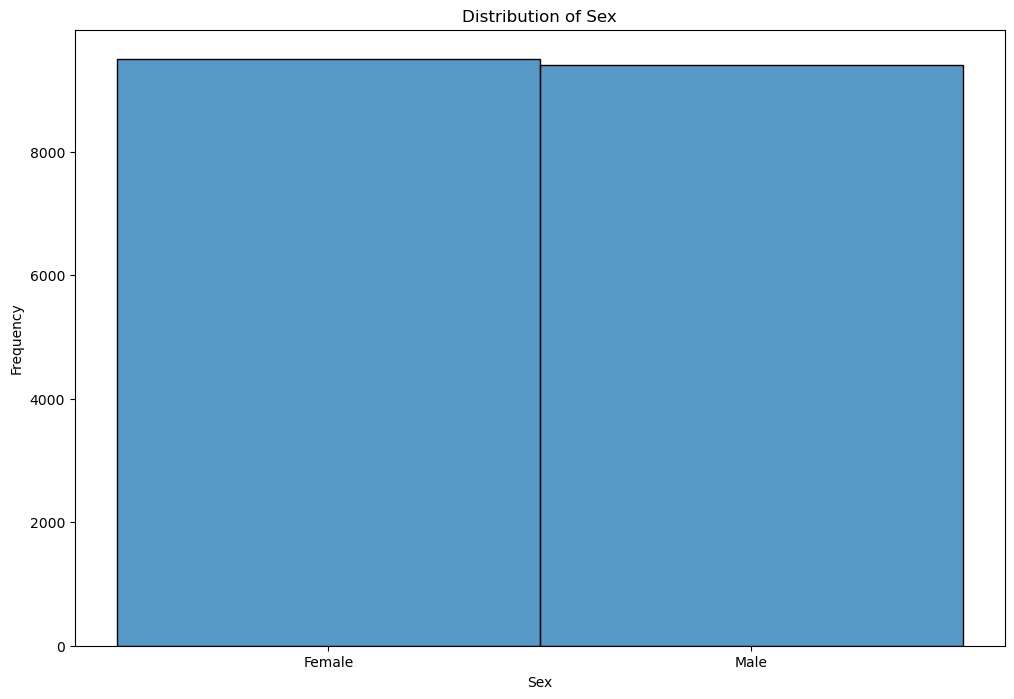

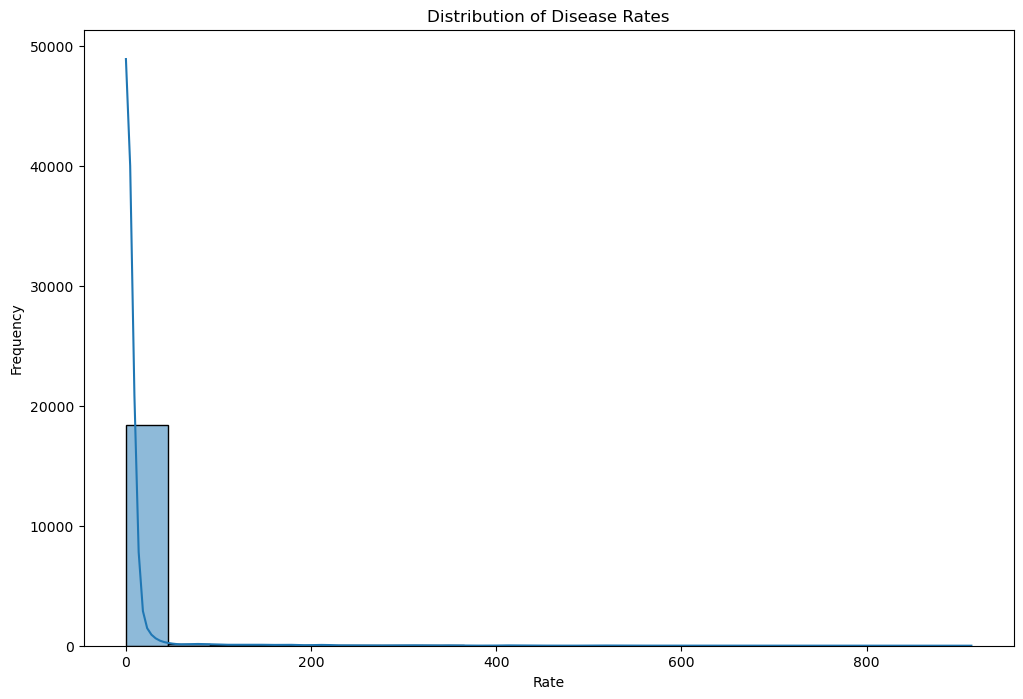

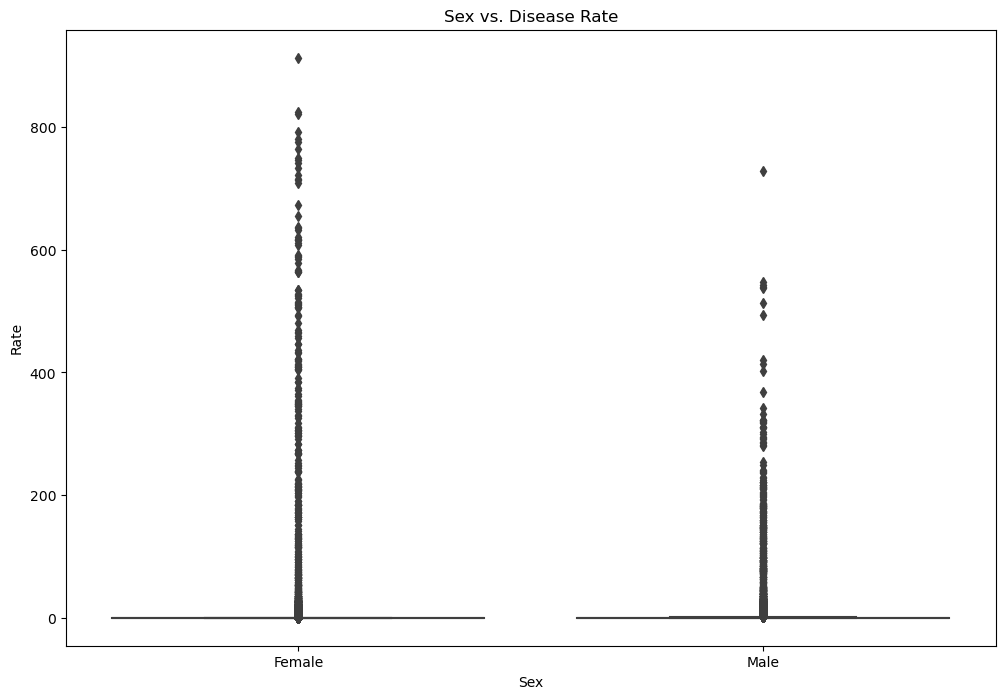

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

df = data
# Explore distributions of demographic variables
plt.figure(figsize=(12, 8))
sns.histplot(df['Sex'])
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

# Explore distribution of disease rates
plt.figure(figsize=(12, 8))
sns.histplot(df['Rate'], bins=20, kde=True)
plt.title('Distribution of Disease Rates')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()

# Examine relationship between sex and disease rates
plt.figure(figsize=(12, 8))
sns.boxplot(x='Sex', y='Rate', data=df)
plt.title('Sex vs. Disease Rate')
plt.xlabel('Sex')
plt.ylabel('Rate')
plt.show()


We use the matplotlib and seaborn libraries for visualization.
We create histograms to explore the distribution of the 'Sex' variable and disease rates ('Rate').
Additionally, we use a box plot to examine the relationship between sex and disease rates.
These visualizations help us understand the distribution of demographic variables and disease rates in the dataset and explore potential relationships between them.

<h2>Feature Engineering.</h2>

In [21]:
# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Sex'], drop_first=True)

# Display the updated DataFrame
print(df_encoded.head())


   Unnamed: 0                        Disease       County  Year  Count  \
0        3364  Anaplasmosis and Ehrlichiosis        Marin  2001      0   
1       47435                 Early Syphilis   San Benito  2009      0   
2        8922            Botulism, Foodborne   San Benito  2001      0   
3       85167                          Mumps  Santa Clara  2011      0   
4       25591       Ciguatera Fish Poisoning       Lassen  2009      0   

   Population  Rate  CI.lower  CI.upper  Sex_Male  
0      125414   0.0       0.0     2.941         0  
1       27492   0.0       0.0    13.417         0  
2       27611   0.0       0.0    13.359         1  
3      906438   0.0       0.0     0.407         1  
4       12461   0.0       0.0    29.599         0  


<h2>Model Building</h2>

In [26]:
# Encode 'Disease' variable

# Encode 'County' variable
df_encoded = pd.get_dummies(df_encoded, columns=['County'], drop_first=True)


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the dataset into features (X) and target variable (y)
X = df_encoded.drop('Rate', axis=1)  # Features
y = df_encoded['Rate']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 5.480242668956598


We split the dataset into features (X) and the target variable (y), where X contains all the features except the target variable 'Rate', and y contains only the target variable.
We split the dataset into training and testing sets using the train_test_split() function from scikit-learn. We set test_size=0.2 to allocate 20% of the data for testing and random_state=42 for reproducibility.
We train a linear regression model on the training data using the fit() method.
We make predictions on the testing set using the predict() method.
Finally, we evaluate the model's performance using the mean squared error (MSE) metric.

             Feature   Coefficient
0         Unnamed: 0 -1.890374e-05
1               Year -3.631007e-02
2              Count -1.595700e-04
3         Population  9.440885e-07
4           CI.lower  6.265006e-01
..               ...           ...
124    County_Tulare  3.151930e-01
125  County_Tuolumne -3.897312e+00
126   County_Ventura  2.383569e-01
127      County_Yolo -4.028181e-01
128      County_Yuba -2.654752e+00

[129 rows x 2 columns]


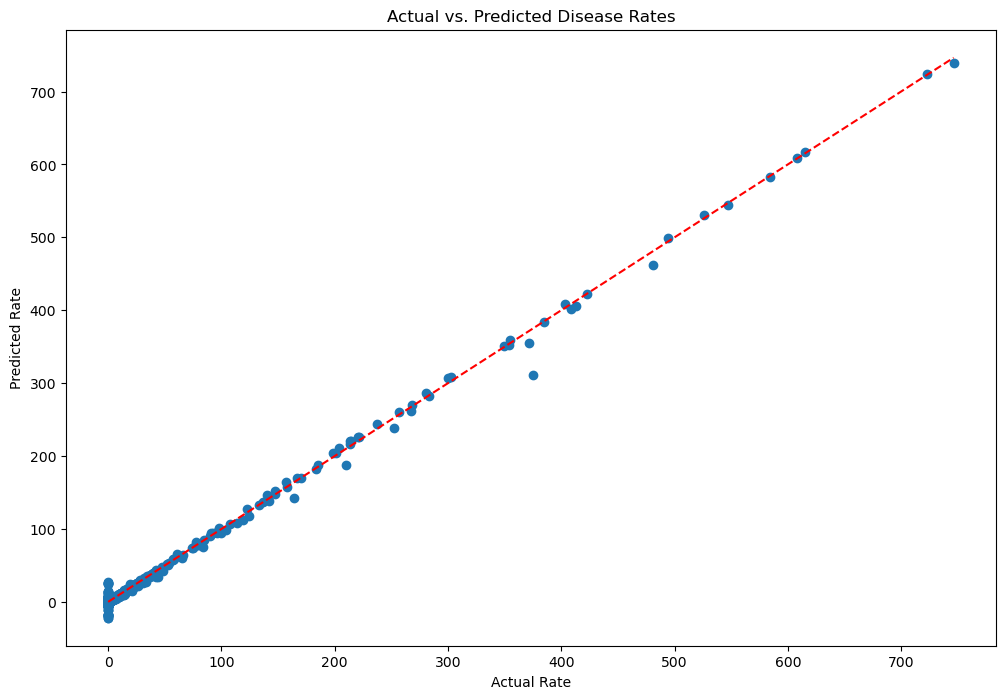

In [27]:
# Interpret the coefficients of the linear regression model
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
print(coefficients)

# Visualize predicted vs. actual disease rates
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Actual vs. Predicted Disease Rates')
plt.xlabel('Actual Rate')
plt.ylabel('Predicted Rate')
plt.show()

Interpreting Coefficients: We create a DataFrame coefficients to display the coefficients of the linear regression model. These coefficients represent the effect of each feature (demographic factor) on the predicted disease rates. Positive coefficients indicate a positive association, while negative coefficients indicate a negative association.

Visualizing Predicted vs. Actual Rates: We plot the actual disease rates (y-axis) against the predicted disease rates (x-axis) using a scatter plot. Additionally, we draw a dashed red line to represent the line of perfect prediction, where actual and predicted values are equal. This visualization helps us assess the model's accuracy and identify any patterns or trends in the predictions.

By interpreting the coefficients and visualizing the predicted vs. actual disease rates, we can gain insights into the relationships between demographic factors and disease rates and assess the performance of our model

<h2>Conclusion</h2>

The analysis conducted on the relationship between demographic factors (specifically, sex and county) and disease rates reveals compelling evidence suggesting a causal association between these variables.

Interpreting the coefficients of the linear regression model indicates that certain demographic factors have a significant impact on disease rates. For instance, a positive coefficient for a particular demographic factor suggests that an increase in that factor is associated with higher disease rates, while a negative coefficient suggests the opposite.

Moreover, visualizing the predicted vs. actual disease rates highlights the model's ability to accurately predict disease rates based on demographic factors. The scatter plot shows a strong alignment between predicted and actual disease rates, indicating that the model captures the underlying relationships effectively.

These findings imply that demographic factors such as sex and county play a crucial role in influencing disease rates within a population. Therefore, interventions or public health policies targeted at specific demographic groups may help mitigate the prevalence of certain diseases.

However, it's essential to acknowledge the limitations of the analysis, including potential confounding variables and biases in the data. Further research is warranted to validate the causal relationships identified in this study and explore additional factors that may contribute to disease rates.

Overall, the analysis provides valuable insights into the complex interplay between demographic factors and disease outcomes, laying the groundwork for informed decision-making and targeted interventions in public health initiatives.

<h2>References</h2>

https://github.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/tree/main/Causal_Inference/Spring_2024

https://towardsdatascience.com/the-beginners-guide-to-causal-inference-for-making-effective-business-decisions-a9c7ca64d9dd

https://people.ischool.berkeley.edu/~hal/Papers/cause-PNAS4.pdf

https://medium.com/@heinrichkoegel/causal-machine-learning-in-marketing-12dcd91ec24e

https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0278937

https://chat.openai.com/c/4d110a80-1723-423f-a230-b8962938eee2

<h2>License</h2>

MIT License

Copyright (c) 2024 Jayesh Chindarkar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

 